useful webpage:
    https://www.kaggle.com/gabriellima/house-sales-in-king-county-usa/comments
        

***
plan:
- view the data
- look for na values.  
    - isna
    - values that substitute for na, e.g. -99.99 or another impossible value
- look for duplicates
    - duplicates = df[df.duplicated(subset='id')]
- decide on columns that are not of any value to us
- possibly create new columns
    - e.g. total sqft column of living and lot
- correlation:
    - heat map
    - matrix


extra
- do sqft_living columns equal sqft_above + sqft_basement?
- is there a way to plot the yr_built to see if 1900 is a null value or not?
- we have lat and long, do we want to do a heat map for higher prices?

***
# Contents

NB that this is a mess and doesnt work at the moment

* [Import Libraries and Data](*Import-Libraries)
* [Viewing the Data](*Viewing-the-Data)
* [Missing Data](*Missing-Data)
* [NA values](*NA Values)
    * Extraenuous Values
    * Duplicate Values
* [Dropping Data](*
* [Correlation of Data](*Correlation-of-Data)


* [Introduction](#Introduction)  
    - [Problem statement](#Problem-statement)  
    
***

# Import Libraries and Data<a name="Import-Libraries"></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

kingdata = pd.read_csv('kc_house_data.csv')

## Viewing the Data

In [3]:
kingdata.head(320)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [4]:
kingdata.shape

(21597, 21)

In [5]:
kingdata.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Columns which are not obvious in meaning:
- date = house was sold
- price = "is prediction target" (does this mean its what kingsdata predicts? or something else?)
- waterfront = if the property has a view to the waterfront
- view = "has been viewed" (scale of 0-4, predominately 0)
- condition = overall state of condition (1-5)
- grade = king's grading system (only 3-13 shown, might be on a larger range)
- sqft_living15/lot15 = sqft of living/lot area of 15 closest neighbors

In [6]:
kingdata.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,19221.0,7.595859e-03,8.682485e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21534.0,2.338627e-01,7.656862e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [7]:
kingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# Missing Data
- check for na
- check for impossible values

## Na values

In [8]:
kingdata.isna().sum().sum()
#Check first if there is any na values.  we find that there's 6281 na values

6281

In [9]:
kingdata.isna().sum().sort_values(ascending=False)
#We can see from this that the columns for yr_renovated and waterfront have a lot of na values.  view only has some

yr_renovated     3842
waterfront       2376
view               63
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64

## Impossible values / Na equivalents

In [10]:
kingdata['yr_renovated'].value_counts(normalize=True).head()
#We can see from this that almost 96% of values in this column are '0'.  This column therefore doesn't offer much value
#This is in addition to the NA values shown before

0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
Name: yr_renovated, dtype: float64

## (Trying to check if the yr_built has na value equivalents)

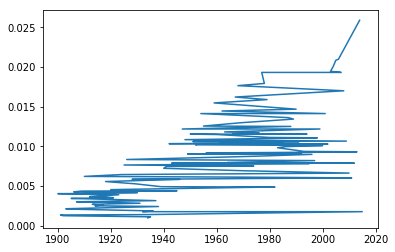

In [11]:
kingdata['yr_built'].value_counts(normalize=True).plot()

## Finding Duplicates

In [12]:
kingdata.shape

(21597, 21)

In [13]:
kingdata.nunique().sort_values(ascending=False)
#Since there are fewer unique IDs than the length of our database, we can assume that there are duplicates

id               21420
sqft_lot          9776
sqft_lot15        8682
lat               5033
price             3622
sqft_living       1034
sqft_above         942
sqft_living15      777
long               751
date               372
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
bathrooms           29
bedrooms            12
grade               11
floors               6
condition            5
view                 5
waterfront           2
dtype: int64

In [14]:
kingdata[kingdata.duplicated()]
#It appears that there are no rows that are exactly the same

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [15]:
kingdata[kingdata['id'].duplicated()].shape
#when we check for duplicates with the ID column.  we have 177 rows with duplicated IDs.  this matches up with 21597-21420=177
#e.g. rows 93 and 94 show that in 5 months house value went up 270,000.  but all other values are the same.
#does this mean its just the same house, renovated and turned around?
#if so, why are there only 177 rows? 20k entries across 100+ years, a house should show up several times each.

(177, 21)

# Dropping Data

In [16]:
# zipcode seems to be of no value as we have longitude and latitude for a location data
# drop the duplicated data
# what does view give us?  i think nothing
# need to drop the yr_renovated column

In [ ]:
# heroes_df = heroes_df.drop(columns = 'Skin color')


# Correlation of Data

In [31]:
kingdata.corr()[['price', 'bedrooms']]

,price,bedrooms
id,-0.016772,0.001150
price,1.000000,0.308787
bedrooms,0.308787,1.000000
bathrooms,0.525906,0.514508
sqft_living,0.701917,0.578212
sqft_lot,0.089876,0.032471
floors,0.256804,0.177944
waterfront,0.276295,-0.002386
view,0.395734,0.078523
condition,0.036056,0.026496


In [164]:
kingdata.corr()['price'].sort_values(ascending=False)
#This seems to be much more useful than the heatmap below

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
bedrooms         0.308787
lat              0.306692
waterfront       0.276295
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

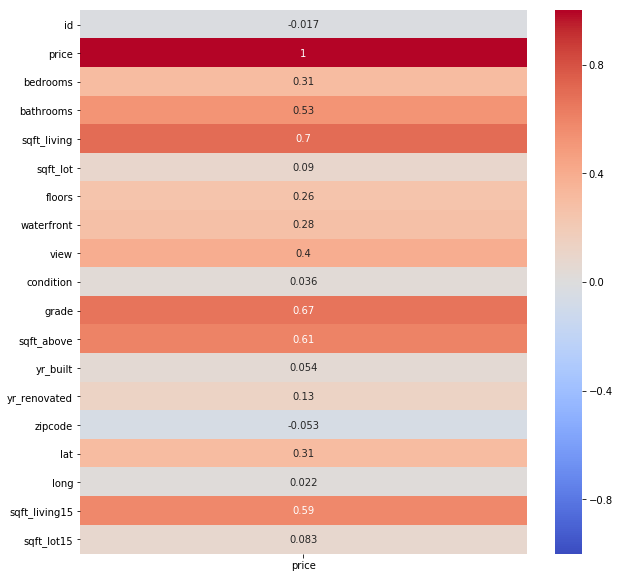

In [169]:
#Plot a heatmap to see where there is a strong correlation
plt.figure(figsize = (10, 10))
sns.heatmap(kingdata.corr()[['price']], vmin = -1, vmax = 1, cmap = 'coolwarm', annot=True)
#from the heatmap below we can see that there are no strong negative correlations, but there are several positive correlations:
#bathrooms, sqft_living, grade, sqft_above, sqft_living15